In [2]:
import pandas as pd

# Load dataset
dataset_path = '/content/datasetFix.xlsx'
data = pd.read_excel(dataset_path)

# Menampilkan 5 data teratas
data.head()


,jumlah_penduduk,luas_wilayah,jumlah_rumah,tembok,jumlah_sekolah,jumlah_rs,usia,indihome,lokal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89863.0,48.466,20892.0,16914.1632,24.0,-,61466.292,ada,ada
2,51589.0,148.370,10887.0,8814.1152,12.0,-,35286.876,ada,ada
3,93775.0,239.580,25805.0,20891.7280,25.0,-,64142.100,ada,ada
4,89418.0,55.000,22143.0,17926.9728,26.0,1,61161.912,ada,ada


In [7]:
# Mengganti nilai "-" dengan 0, dan mengisi nilai NaN dengan 0 pada kolom 'jumlah_rs'
data['jumlah_rs'] = data['jumlah_rs'].replace("-", 0).fillna(0).astype(int)

# Mengonversi nilai "ada" menjadi 1, "tidak" dan "belum" menjadi 0 pada kolom 'indihome' dan 'lokal'
data['indihome'] = data['indihome'].replace({"ada": 1, "tidak": 0, "belum": 0}).fillna(0).astype(int)
data['lokal'] = data['lokal'].replace({"ada": 1, "tidak": 0, "belum": 0}).fillna(0).astype(int)

# Memeriksa hasil perubahan
data.head()


<ipython-input-7-ba495f0194f8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['indihome'] = data['indihome'].replace({"ada": 1, "tidak": 0, "belum": 0}).fillna(0).astype(int)
<ipython-input-7-ba495f0194f8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['lokal'] = data['lokal'].replace({"ada": 1, "tidak": 0, "belum": 0}).fillna(0).astype(int)


,jumlah_penduduk,luas_wilayah,jumlah_rumah,tembok,jumlah_sekolah,jumlah_rs,usia,indihome,lokal
0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0
1,89863.0,48.466,20892.0,16914.1632,24.0,0,61466.292,1,1
2,51589.0,148.370,10887.0,8814.1152,12.0,0,35286.876,1,1
3,93775.0,239.580,25805.0,20891.7280,25.0,0,64142.100,1,1
4,89418.0,55.000,22143.0,17926.9728,26.0,1,61161.912,1,1


In [8]:
# Menampilkan daftar kolom dalam dataset
print(data.columns)


Index(['jumlah_penduduk', 'luas_wilayah', 'jumlah_rumah', 'tembok',
       'jumlah_sekolah', 'jumlah_rs', 'usia', 'indihome', 'lokal'],
      dtype='object')


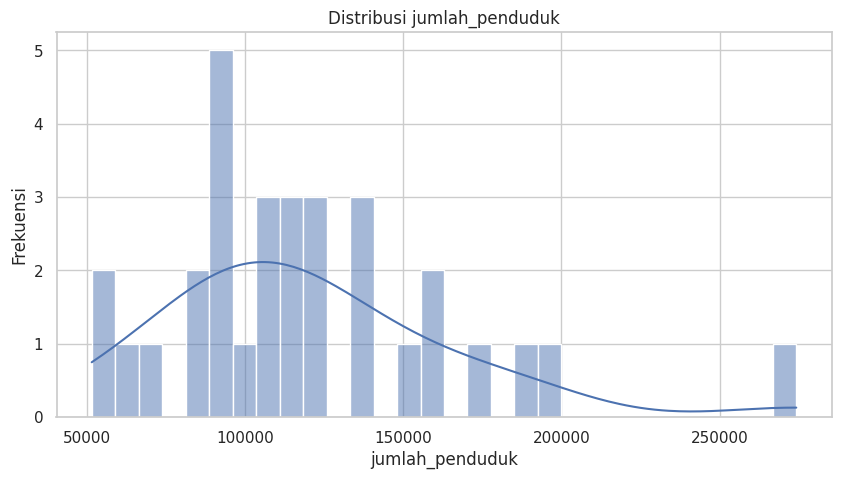

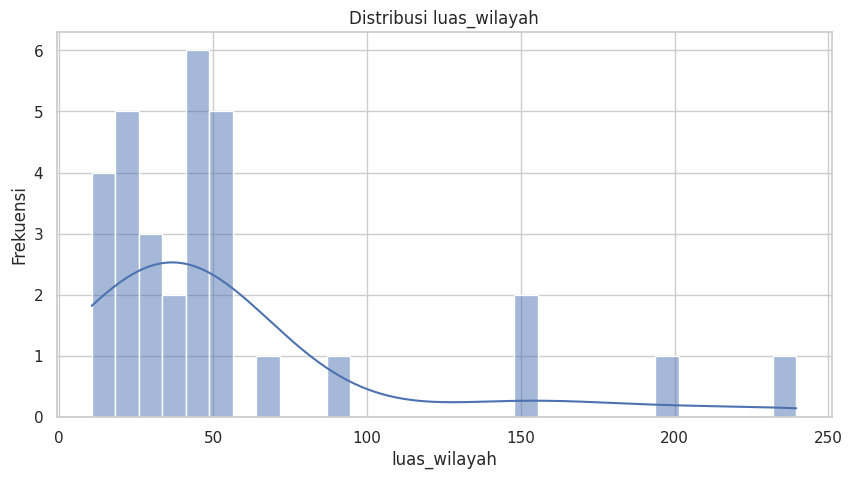

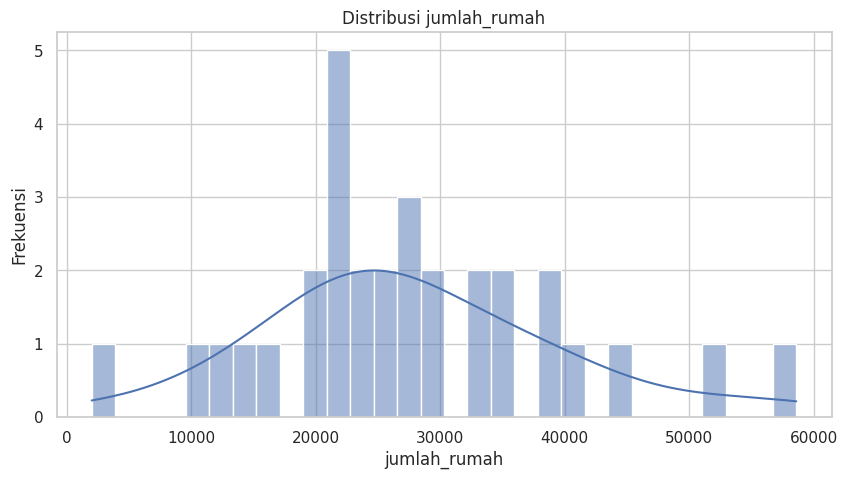

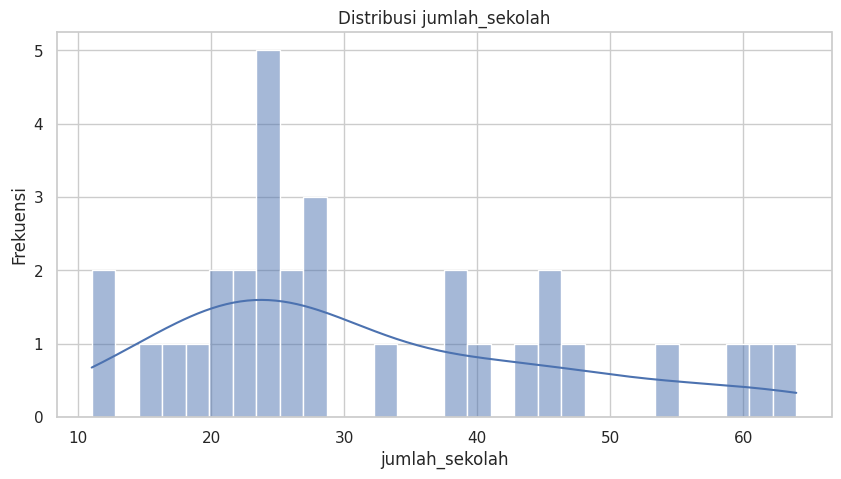

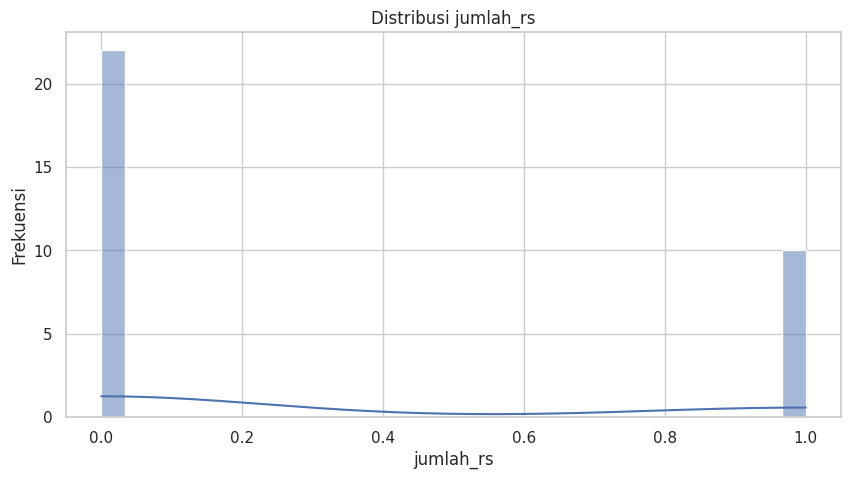

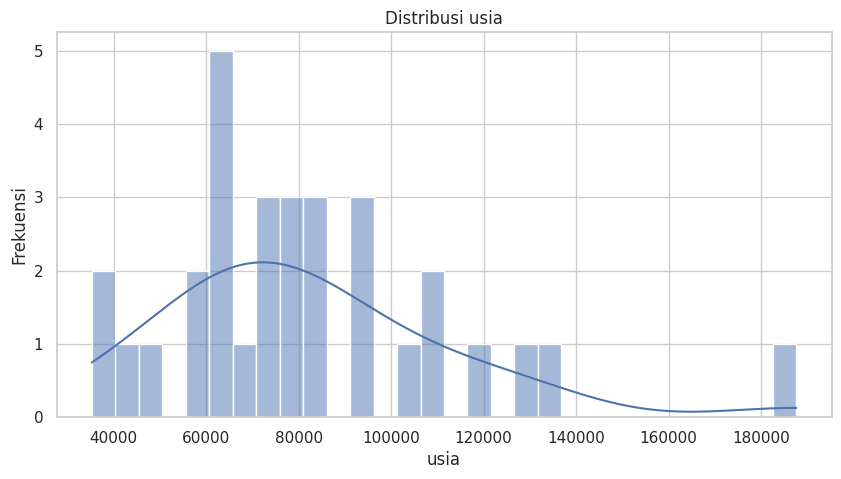

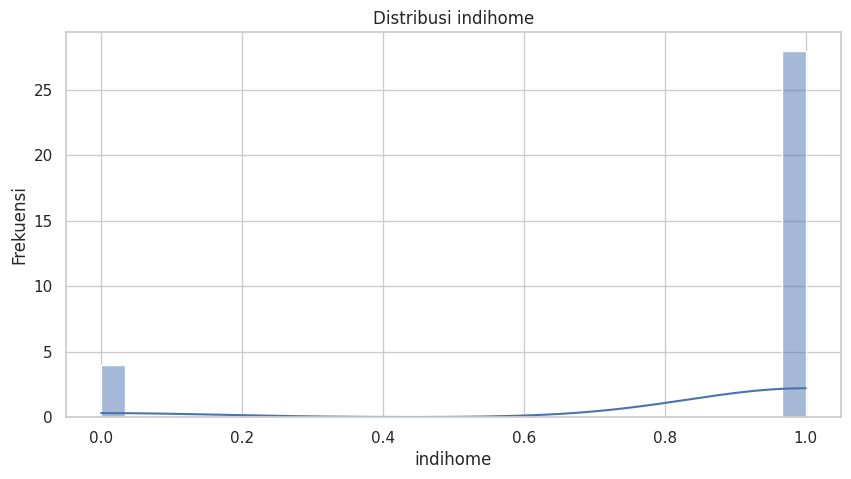

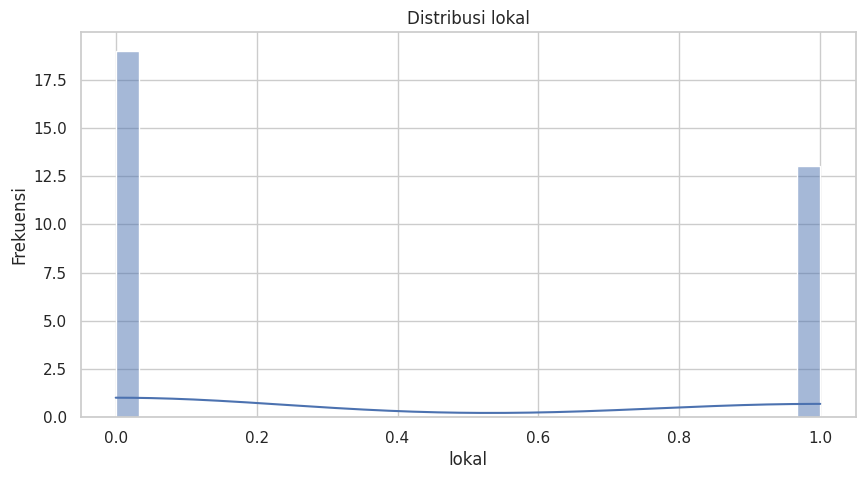

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Univariate Analysis: Menampilkan histogram untuk setiap kolom numerik
numeric_columns = ['jumlah_penduduk', 'luas_wilayah', 'jumlah_rumah',
                   'jumlah_sekolah', 'jumlah_rs', 'usia', 'indihome', 'lokal']

# Menampilkan histogram untuk setiap kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()


<Figure size 1200x1000 with 0 Axes>

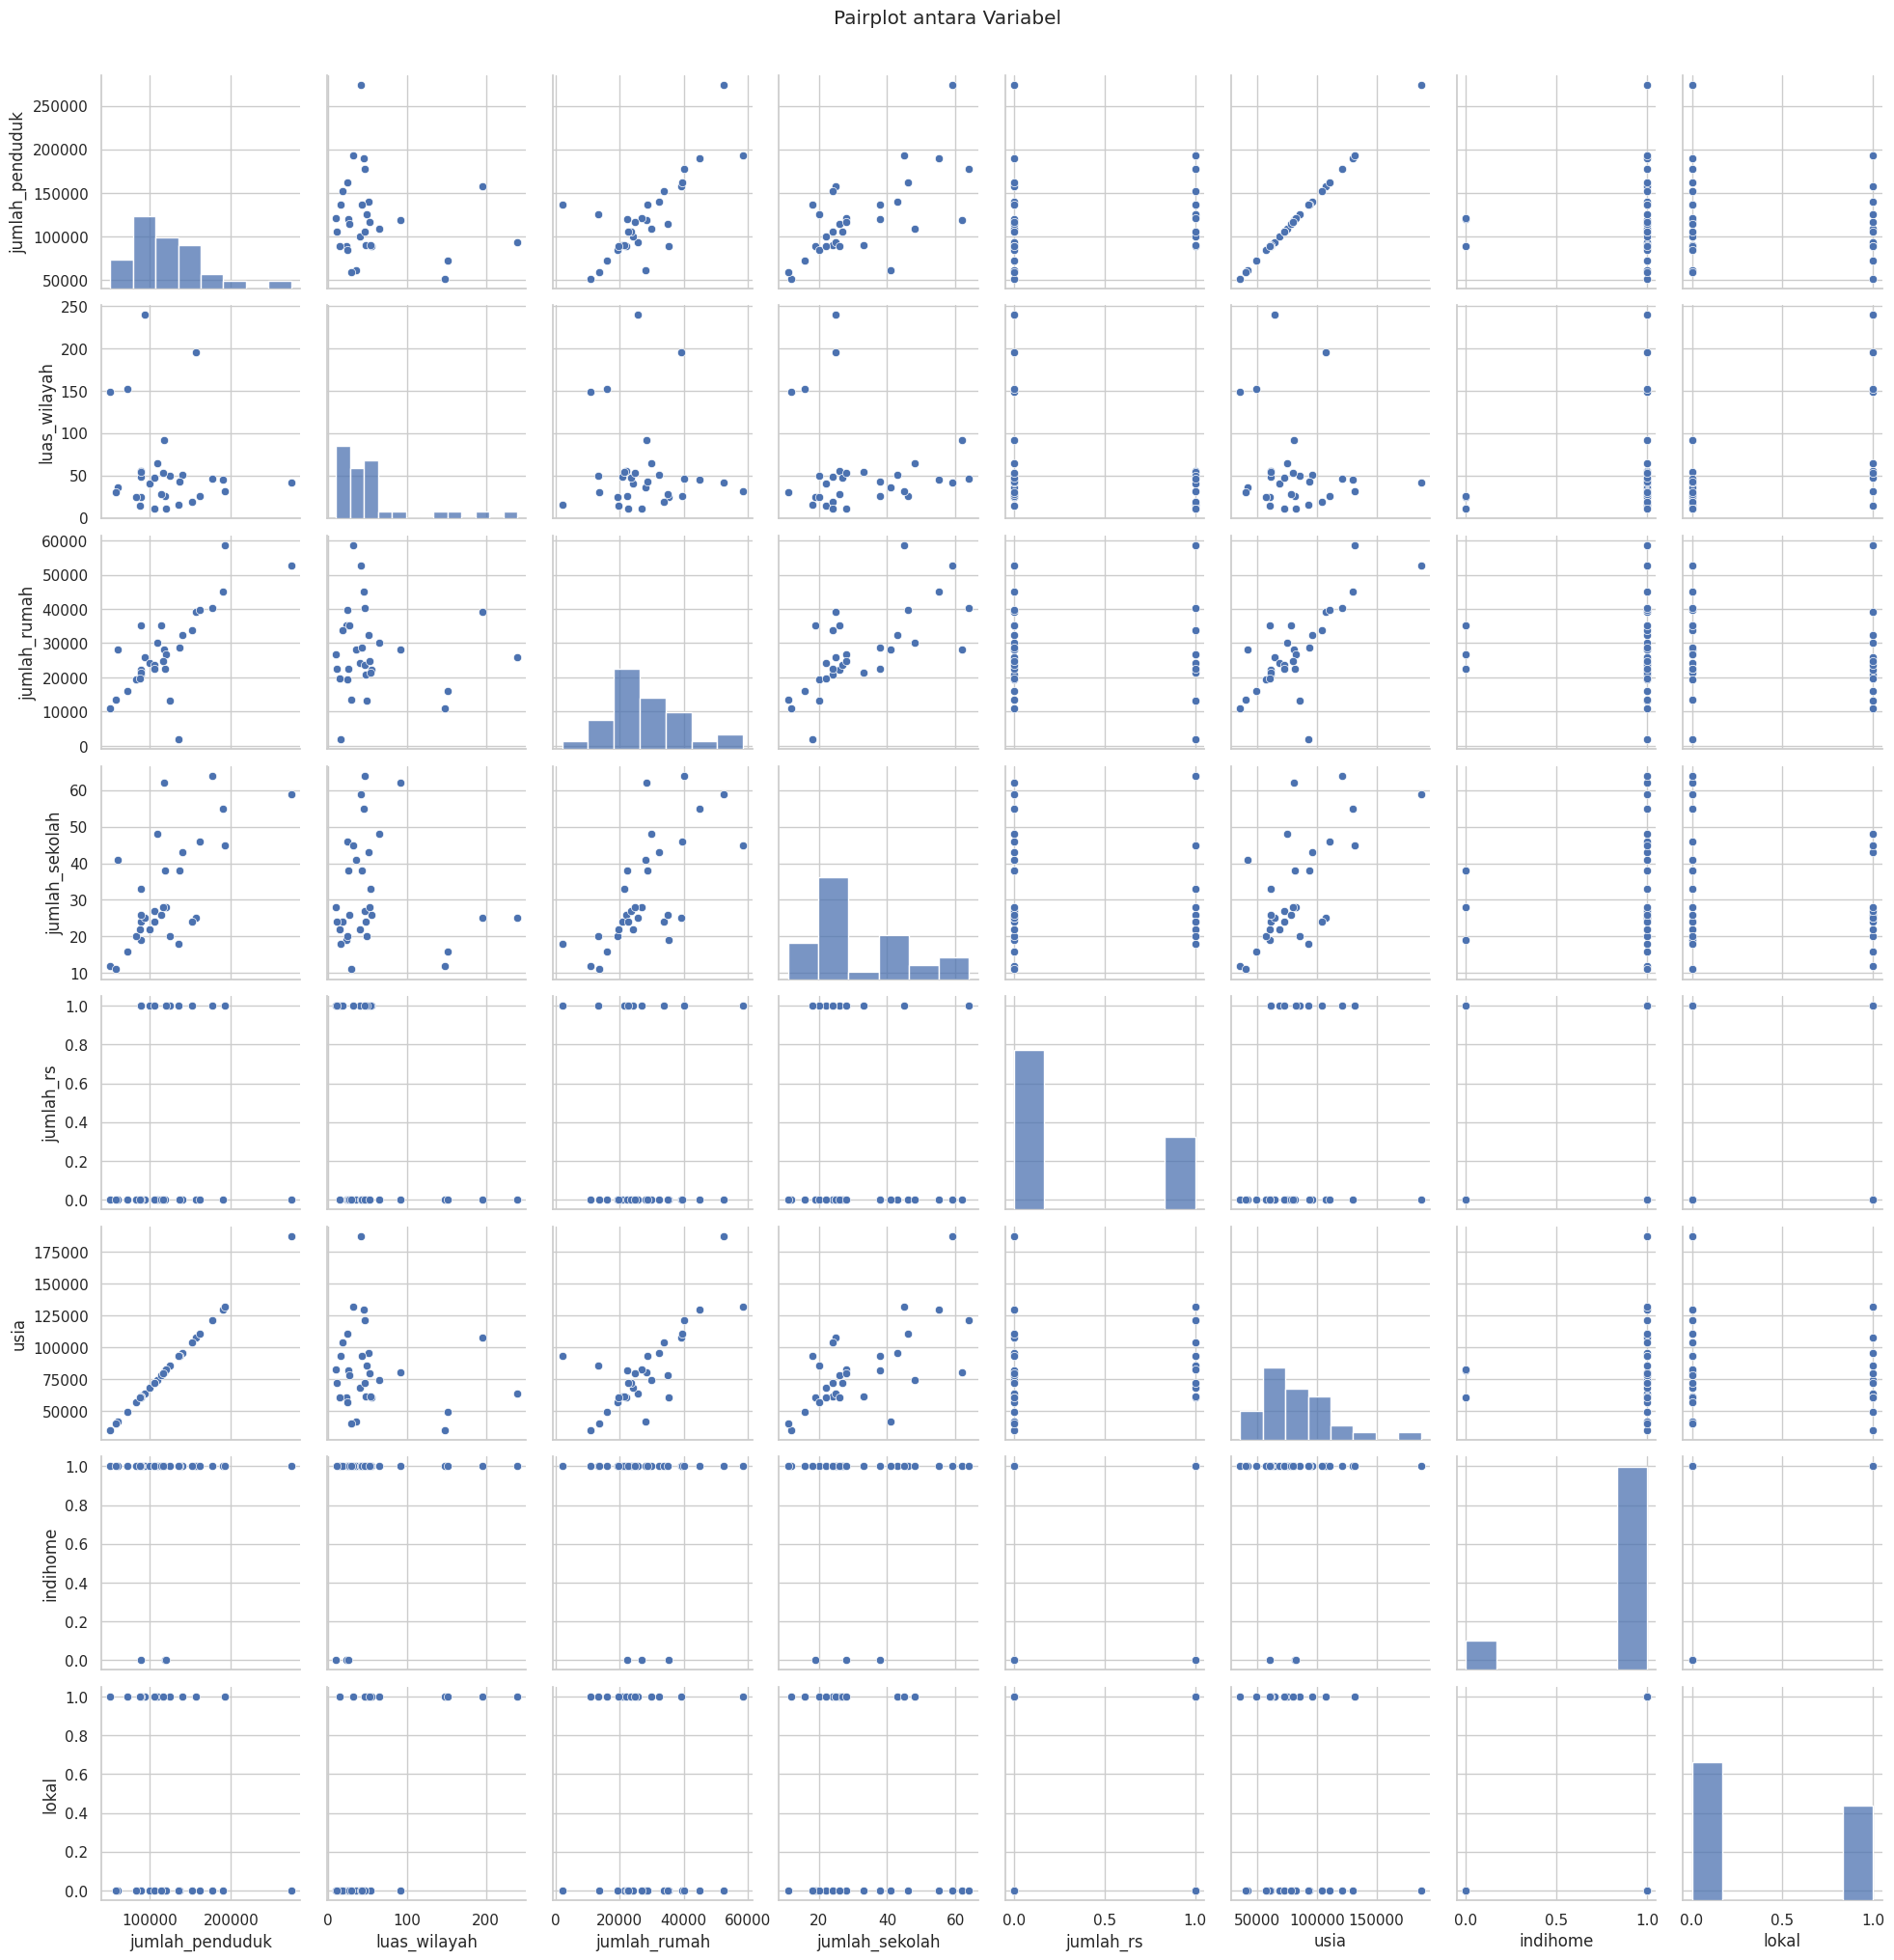

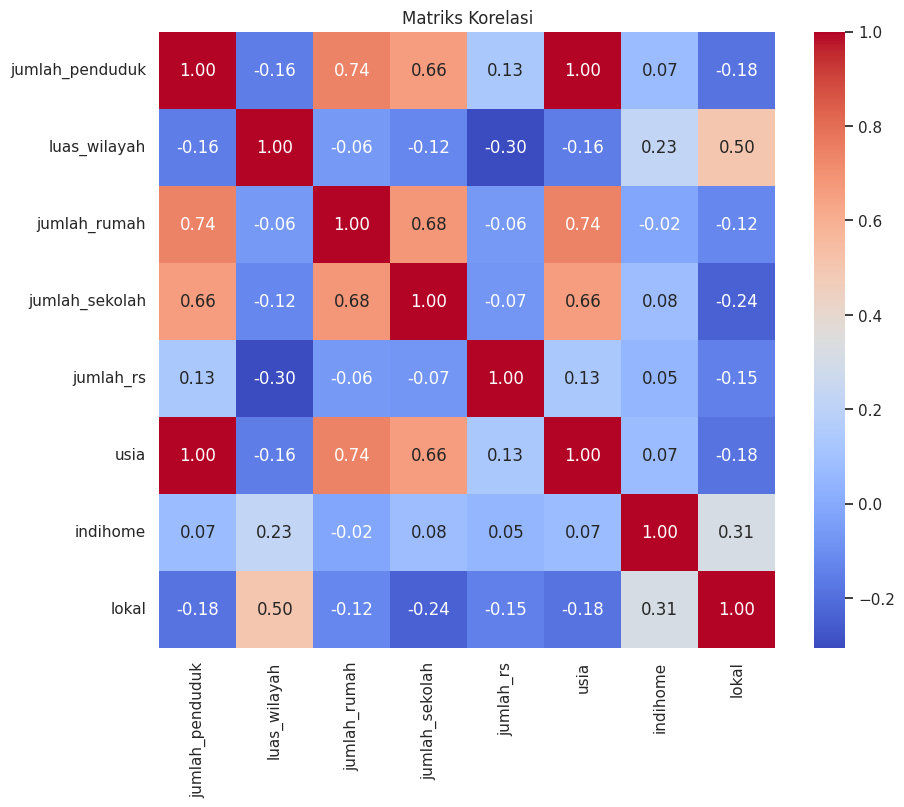

In [10]:
# Multivariate Analysis: Menggunakan pairplot untuk melihat hubungan antara kolom
plt.figure(figsize=(12, 10))
sns.pairplot(data[numeric_columns])
plt.suptitle('Pairplot antara Variabel', y=1.02)
plt.show()

# Heatmap untuk melihat korelasi antara variabel
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()


In [12]:
# Memeriksa jumlah nilai NaN dalam dataset
print("Jumlah nilai NaN sebelum pengisian:")
print(data.isnull().sum())

# Mengisi nilai NaN dengan 0 (Anda bisa memilih cara lain seperti rata-rata atau median)
data.fillna(0, inplace=True)

# Memeriksa jumlah nilai NaN setelah pengisian
print("\nJumlah nilai NaN setelah pengisian:")
print(data.isnull().sum())


Jumlah nilai NaN sebelum pengisian:
jumlah_penduduk    1
luas_wilayah       1
jumlah_rumah       1
tembok             1
jumlah_sekolah     1
jumlah_rs          0
usia               1
indihome           0
lokal              0
dtype: int64

Jumlah nilai NaN setelah pengisian:
jumlah_penduduk    0
luas_wilayah       0
jumlah_rumah       0
tembok             0
jumlah_sekolah     0
jumlah_rs          0
usia               0
indihome           0
lokal              0
dtype: int64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [16]:
# Memeriksa jumlah nilai NaN dalam dataset
print("Jumlah nilai NaN sebelum pengisian:")
print(data.isnull().sum())

# Mengisi nilai NaN untuk kolom numerik dengan rata-rata kolom tersebut
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Jika kolom 'indihome' dan 'lokal' masih ada NaN, kita isi dengan 0 (atau bisa menggunakan modus)
data['indihome'].fillna(0, inplace=True)
data['lokal'].fillna(0, inplace=True)

# Memeriksa jumlah nilai NaN setelah pengisian
print("\nJumlah nilai NaN setelah pengisian:")
print(data.isnull().sum())


Jumlah nilai NaN sebelum pengisian:
jumlah_penduduk    0
luas_wilayah       0
jumlah_rumah       0
tembok             0
jumlah_sekolah     0
jumlah_rs          0
usia               0
indihome           0
lokal              0
dtype: int64

Jumlah nilai NaN setelah pengisian:
jumlah_penduduk    0
luas_wilayah       0
jumlah_rumah       0
tembok             0
jumlah_sekolah     0
jumlah_rs          0
usia               0
indihome           0
lokal              0
dtype: int64


<ipython-input-16-026427207e1b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-16-026427207e1b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

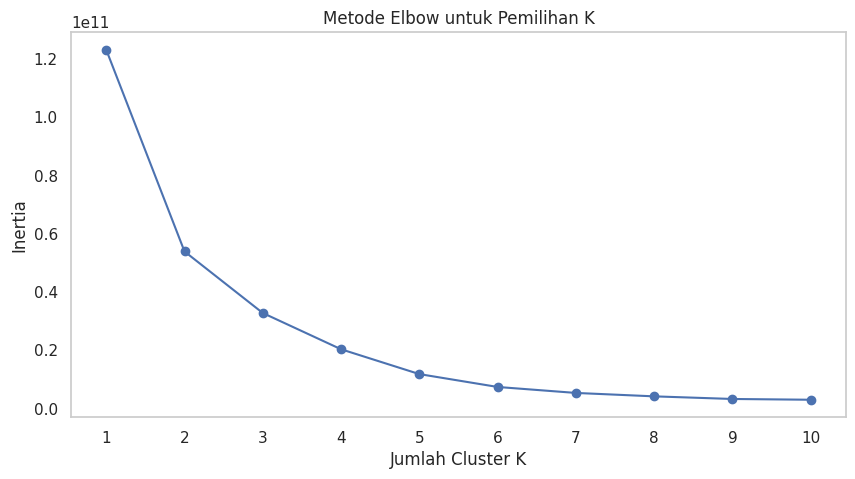

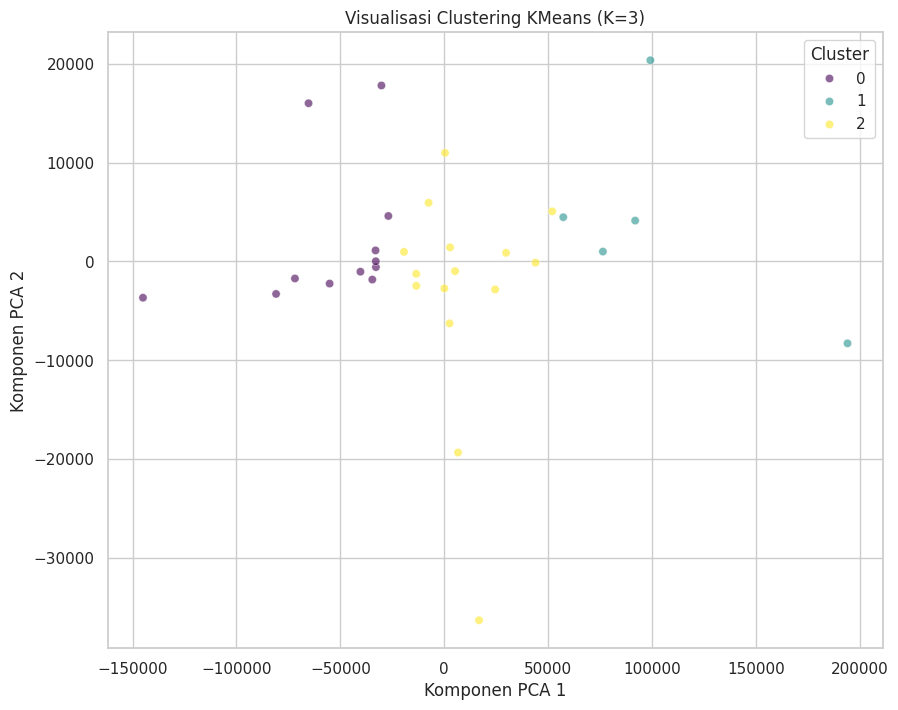

In [17]:
# Menentukan fitur yang akan digunakan untuk PCA
X = data.drop(columns=['indihome', 'lokal', 'jumlah_rs', 'Cluster'], errors='ignore')

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Mencoba beberapa nilai K untuk KMeans
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Visualisasi hasil Inertia
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow untuk Pemilihan K')
plt.xlabel('Jumlah Cluster K')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

# Memilih K optimal (misalnya K=3) dan menerapkan KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_pca)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.6)
plt.title(f'Visualisasi Clustering KMeans (K={optimal_k})')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.show()


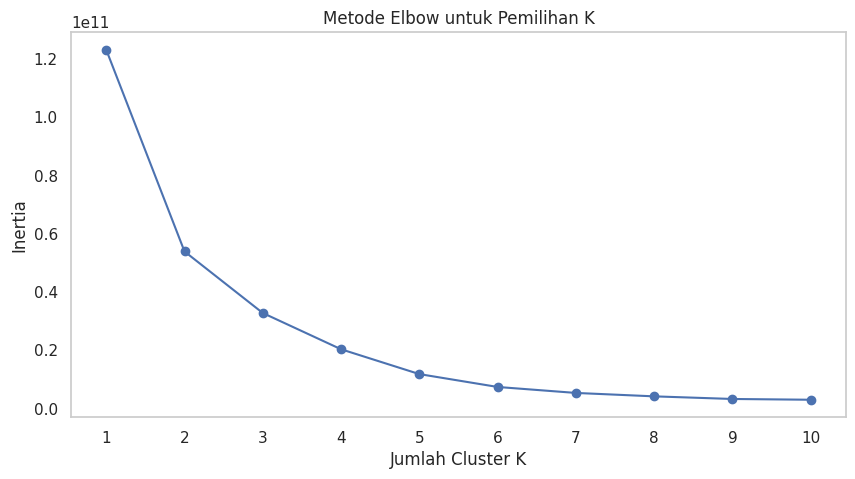

In [18]:
# Menentukan fitur yang akan digunakan untuk PCA
X = data.drop(columns=['indihome', 'lokal', 'jumlah_rs', 'Cluster'], errors='ignore')

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Mencoba beberapa nilai K untuk KMeans
inertia = []
K = range(1, 11)  # Menguji K dari 1 sampai 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Visualisasi hasil Inertia untuk menentukan K optimal
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow untuk Pemilihan K')
plt.xlabel('Jumlah Cluster K')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()


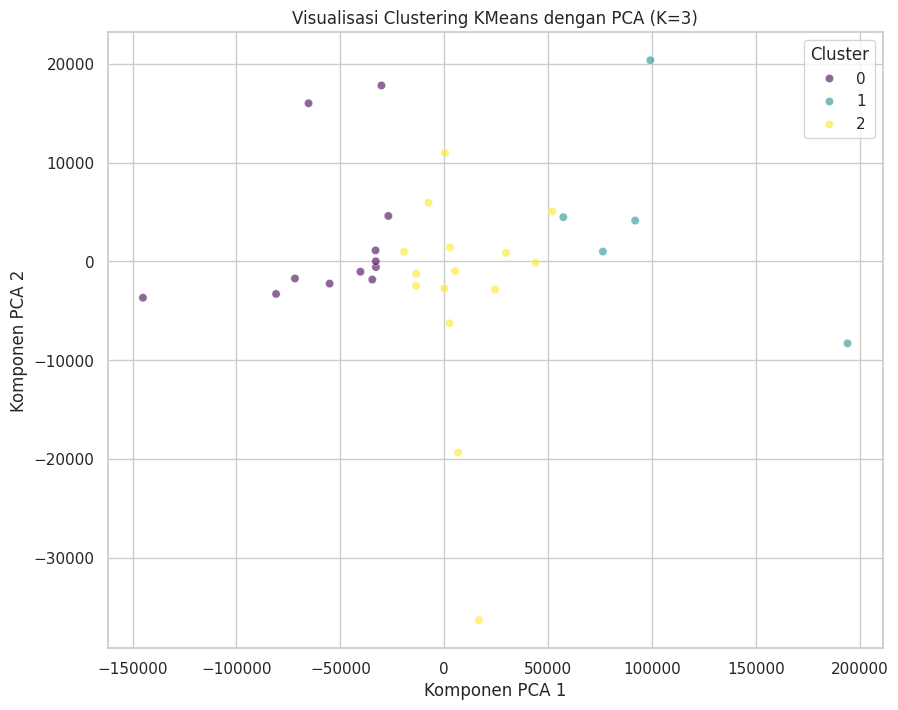

In [19]:
# Memilih K optimal (misalnya K=3 setelah analisis elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_pca)

# Visualisasi hasil clustering menggunakan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.6)
plt.title(f'Visualisasi Clustering KMeans dengan PCA (K={optimal_k})')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.show()


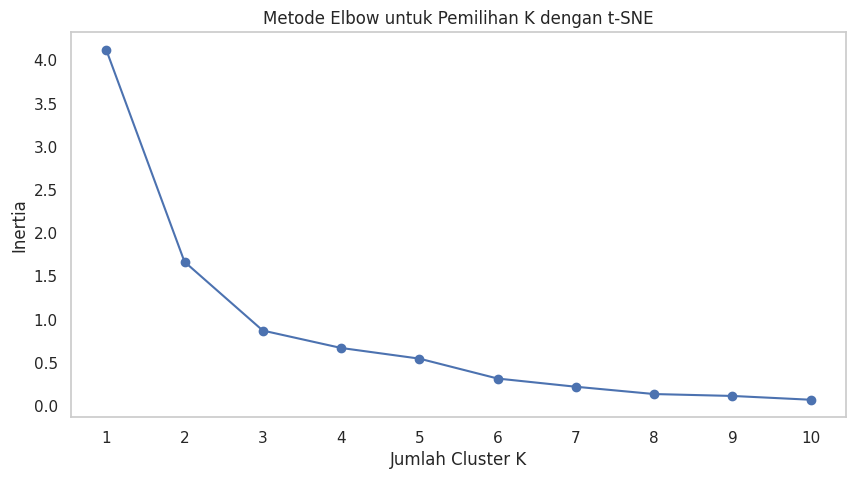

In [20]:
from sklearn.manifold import TSNE

# Reduksi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Mencoba beberapa nilai K untuk KMeans pada hasil t-SNE
inertia_tsne = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tsne)
    inertia_tsne.append(kmeans.inertia_)

# Visualisasi hasil Inertia untuk t-SNE
plt.figure(figsize=(10, 5))
plt.plot(K, inertia_tsne, marker='o')
plt.title('Metode Elbow untuk Pemilihan K dengan t-SNE')
plt.xlabel('Jumlah Cluster K')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()


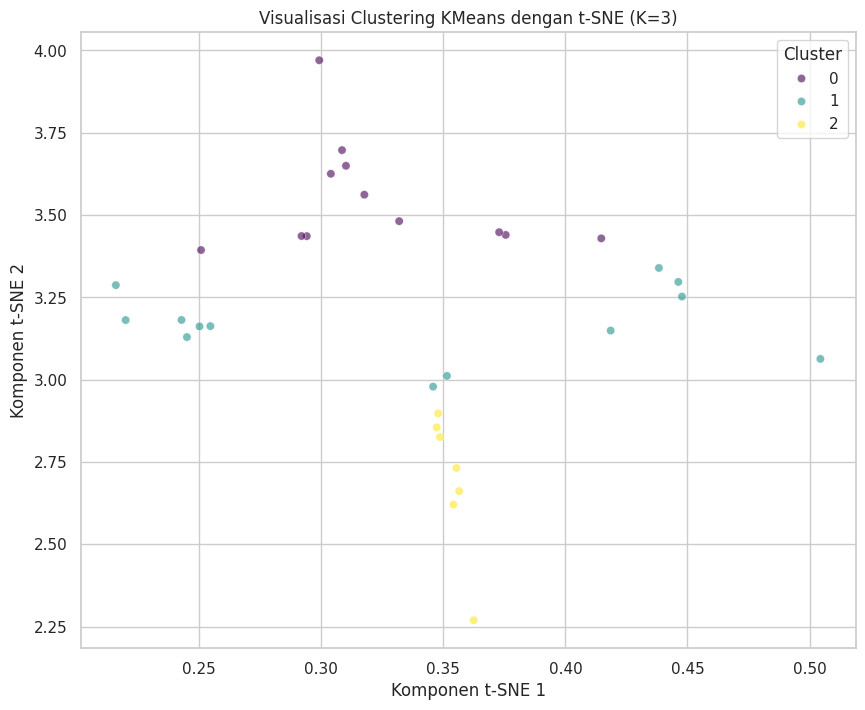

In [21]:
# Memilih K optimal (misalnya K=3 setelah analisis elbow)
optimal_k_tsne = 3
kmeans_tsne = KMeans(n_clusters=optimal_k_tsne, random_state=42)
data['Cluster_TSNE'] = kmeans_tsne.fit_predict(X_tsne)

# Visualisasi hasil clustering menggunakan t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Cluster_TSNE'], palette='viridis', alpha=0.6)
plt.title(f'Visualisasi Clustering KMeans dengan t-SNE (K={optimal_k_tsne})')
plt.xlabel('Komponen t-SNE 1')
plt.ylabel('Komponen t-SNE 2')
plt.legend(title='Cluster')
plt.show()
